# NN tension prediction for SUPERball
### &nbsp; &nbsp; &nbsp; Chiara Ercolani


This file loads an already existing trained neural network and uses it on a different dataset than the one the network was trained on.

Dataset : 2017-10-23_18-07-28_big_dataset_v1.mat

In [1]:
# Import libraries
import tensorflow as tf
import numpy as np
import collections
import os
import collections
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style
import scipy.io
from time import sleep 

In [2]:
#Validate created model with a compltely different dataset
D=24
batch_size = 100
VALID_SET_SIZE=20000

#Importing dataset
dataset_valid=scipy.io.loadmat('2017-10-23_18-07-28_big_dataset_v1.mat')
dataset_effort_valid=dataset_valid.get('effort')


valid_target=[]
for i in range(0, VALID_SET_SIZE):
    valid_target.append(dataset_effort_valid[i,D])
valid_target=np.asarray(valid_target) 
valid_target=np.reshape(valid_target,[len(valid_target),1])
print(valid_target.shape)


valid_features=[]
for i in range(0, VALID_SET_SIZE):
    valid_features.append(dataset_effort_valid[i,0:D])
valid_features=np.asarray(valid_features)
valid_features=np.reshape(valid_features,[len(valid_features),D])

print(valid_features.shape)

val_margin=0.1
avg_acc=0            
validation_prediction=[]
valid_batch=int(len(valid_features)/batch_size)

(20000, 1)
(20000, 24)


INFO:tensorflow:Restoring parameters from ./NN_tension_pred_saver-200000


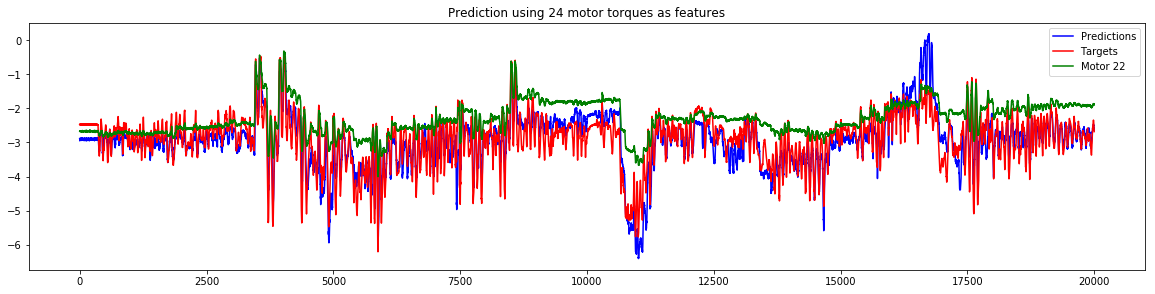

In [3]:
#LOAD trained neural network
sess=tf.Session()
saver = tf.train.import_meta_graph('NN_tension_pred_saver-200000.meta')
saver.restore(sess,tf.train.latest_checkpoint('./'))

# Get saved graph
graph=tf.get_default_graph()

# Get placeholder variables
Xin=graph.get_tensor_by_name("Xin:0")
y_=graph.get_tensor_by_name("y_:0")

#Use trained session to predict the output
for j in range (valid_batch):    
    inp_data = valid_features[j*batch_size:(j+1)*batch_size,:]
    pred_v = sess.run(y_, feed_dict={Xin: inp_data})
    validation_prediction=np.append(validation_prediction,pred_v)
    

#Plot results
x=np.arange(0,len(valid_features))
y1= validation_prediction
y2= valid_target
y3=-valid_features[:,21]*0.0175/0.008

fig= plt.figure(figsize=(20,10))
ax1=plt.subplot(211)
ax1.plot(x,y1,'b',label='Predictions')
ax1.plot(x,y2,'r',label='Targets')
ax1.plot(x,y3,'g',label='Motor 22')
ax1.legend(loc="upper right")

plt.title('Prediction using 24 motor torques as features')

plt.show()

#sess.close()